This notebook actually just runs the help for each of the codes in the Vibration Testing Package that currently work.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import vibrationtesting as vt
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
sample_freq = 1e3
tfinal = 5
fs = 100
A = 10
freq = 5

In [16]:
sp.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
vt.hanning(sp.arange(0,10,1))

IndexError: tuple index out of range

In [5]:
noise_power = 0.001 * sample_freq / 2
time = sp.reshape(sp.arange(0, tfinal, 1/sample_freq),(1,-1))
xsin = A*sp.sin(2*sp.pi*freq*time)
xcos = A*sp.cos(2*sp.pi*freq*time)
    # assembling individual records. vstack assembles channels

5000
[ 0.  0.  0. ...,  0.  0.  0.]
5000


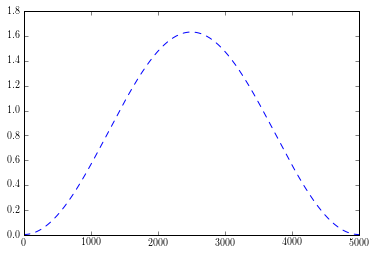

In [12]:
print(vt.hanning(xsin)[0,:])
plt.plot(vt.hanning(xsin)[:,1])

blackwin is untested
blackwin is untested
(5000,)
(5000, 2)
(1, 5000, 2)
(1, 5000, 2)


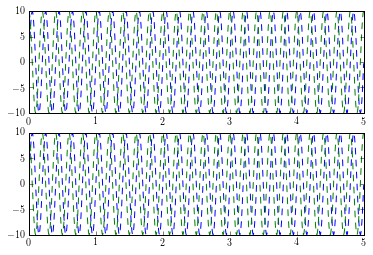

In [14]:
x=sp.dstack((xsin,xcos)) # assembling individual records. vstack
xw=vt.blackwin(x)*x
plt.subplot(2, 1, 1)
print(time[0,:].shape)
print(x[0,:,:].shape)
plt.plot(time[0,:],x[0,:,:])
plt.subplot(2, 1, 2)
plt.plot(time[0,:],xw[0,:,:])
print(x.shape)
print(xw.shape)

In [39]:
f = vt.hanning(5)
print(f.shape)
win1,win2,_ = sp.meshgrid(f,sp.arange(1),sp.arange(2))
print(f)
print(win1[0,:,0])
print(win1.shape)
#print(win2)

5
(5,)
[  0.00000000e+00   9.12870929e-01   1.82574186e+00   9.12870929e-01
   2.73817421e-32]
[  0.00000000e+00   9.12870929e-01   1.82574186e+00   9.12870929e-01
   2.73817421e-32]
(1, 5, 2)


In [20]:
help(sp.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

In [15]:
sp.arange(2)

array([0, 1])

In [ ]:
plt.ylim([-20, 20])

plt.title('Unwindowed data, 2 records.')

plt.ylabel('$x(t)$')


In [ ]:
plt.subplot(2, 1, 2)

plt.title('Original (raw) data.')

plt.plot(time[0,:],xw[0,:],time[0,:],vt.hanning(x)[0,:]*A,'--',time[0,:],-vt.hanning(x)[0,:]*A,'--')


In [ ]:
plt.ylabel('Hanning windowed $x(t)$')

plt.xlabel('time')

plt.title('Effect of window. Note the scaling to conserve ASD amplitude')

plt.show()

In [ ]:
help(vt.hanning)